# Table of Contents

1. [Overview](#Overview)

    a. [Business problem](#Business-problem)

    b. [Data sources](#Data-sources)
    
    c. [Process summary](#Process-summary)

2. [Data import and pre-processing](#Data-import-and-pre-processing)

    a. [Import and initial cleaning](#Import-and-initial-cleaning)
    
    b. [Expanding the dataset with spam texts](#Expanding-the-dataset-with-spam-texts)

    c. [Removing duplicate rows](#Removing-duplicate-rows)
    
    d. [Converting LABEL to a binary column](#Converting-LABEL-to-a-binary-column)
    
    e. [Train/test split & TF-IDF transformation](#Train/test-split-&-TF-IDF-transformation)

3. [Classification modelling](#Classification-modelling)

    a. [Naive Bayes](#Naive-Bayes)
    
    b. [Logistic regression](#Logistic-regression)

4. [Model evaluation & comparison](#Classification-modelling)

    a. [Assessing classification metrics and the confusion matrix](#Assessing-classification-metrics-and-the-confusion-matrix)
    
    b. [Assessing misclassified spam texts](#Assessing-misclassified-spam-texts)

5. [Spam detector demonstrations](#Spam-detector-demonstrations)

    a. [Functions and examples](#Functions-and-examples)
    
    b. [Try it yourself!](#Try-it-yourself!)

6. [Conclusion](#Conclusion)

    a. [Next steps](#Next-steps)

# Overview 

Natural Language Processing was utilised to build an SMS spam detector. Generative (Naive Bayes) and discriminative (logistic regression) binary classification models were trained on the same dataset of spam and legitimate (i.e., 'ham') text messages. The Naive Bayes model featured overall better performance. Future evaluation across other classification algorithms, updating the training dataset with increasingly sophisticated scam attempts and the incorporation of input beyond the language of text messages may further improve model performance.
___

## Business problem

__[A recent report compiled by the Australian Competition & Consumer Commission (ACCC)](https://www.accc.gov.au/media-release/accc-calls-for-united-front-as-scammers-steal-over-3bn-from-australians)__ notes how Australians have lost a total of $3.1 billion to scams in 2022 - an 80% jump in losses compared to numbers reported the year prior. SMS/text messages appeared to be the communication mode of choice for scammers.

Natural language processing (NLP) is a computational approach in analysing natural human speech. It has seen various applications, from summarising documents to answering text-based questions. NLP models are also commonly used to tackle the spam detection problem. 

The current project aims to detect and distinguish between spam and legitimate (i.e., 'ham') text messages by utilising the __[Bag of Words (BoW)](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)__ and __[Term Frequency-Inverse Document Frequency (TF-IDF)](https://monkeylearn.com/blog/what-is-tf-idf/)__ techniques. The spam detector will be built using __[Naive Bayes and Logistic Regression](https://dataespresso.com/en/2017/10/24/comparison-between-naive-bayes-and-logistic-regression/)__ - two of the more popular classifiers in machine learning - and performance between models will be compared.


___

## Data sources

Both the Naive Bayes and Logistic Regression classifiers were built using information from the following datasets: 


- **SMS Spam Collection** (`spam.csv`), compiled by __[Tiago Almeida and Jos Hidalgo](https://archive.ics.uci.edu/dataset/228/sms+spam+collection)__ from the University of California, Irvine. The dataset contains 5572 texts, of which 13% are spam
- **SMS Phishing Dataset** (`Dataset_5971.csv`), compiled by __[Sandhya Mishra and Devpriya Soni](https://data.mendeley.com/datasets/f45bkkt8pr/1)__ from the Jaypee Institute of Information Technology. The dataset contains 5971 texts, of which 13% are spam/smishing (i.e., __[SMS-phishing](https://www.google.com/search?q=what+is+smishing&rlz=1C1GCEA_enAU1065AU1065&oq=what+is+smishing&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQRRhAMgkIAhAjGCcYigUyCQgDECMYJxiKBTIJCAQQABhDGIoFMgkIBRAAGEMYigUyCQgGEAAYQxiKBTIJCAcQABhDGIoF0gEIMTQ3OWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8)__)

___

## Process summary

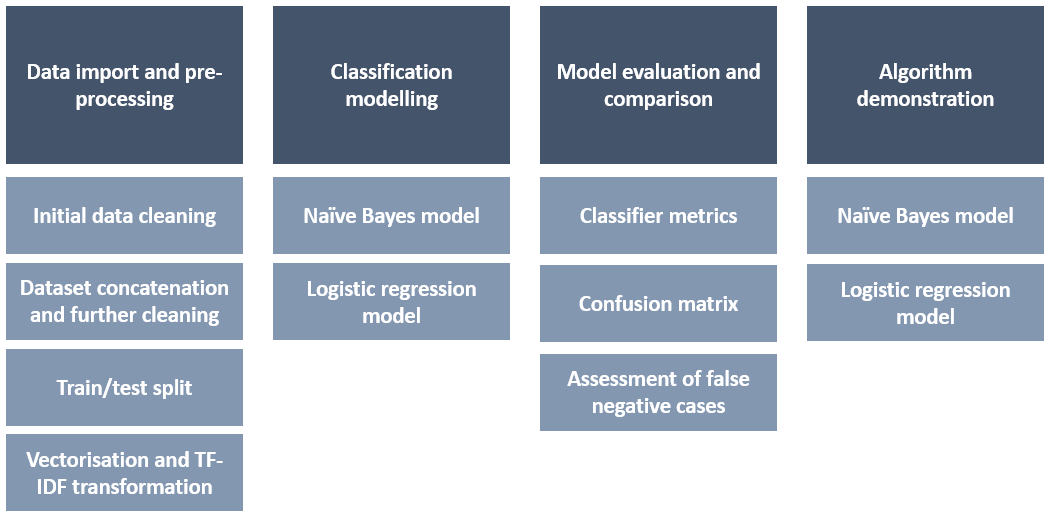

___

# Data import and pre-processing

## Import and initial cleaning

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
# import the dataset
filepath = r'.\data'

text_df = pd.read_csv(filepath + r'\spam.csv', encoding='ISO-8859-1')

In [3]:
# preview the dataset
text_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop empty columns 
text_df = text_df[['v1', 'v2']]

# rename remaining columns
text_df.columns = ['LABEL', 'TEXT']

In [5]:
# confirm changes to columns
text_df.head()

,LABEL,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print("Number of rows:", text_df.shape[0])

Number of rows: 5572


In [7]:
text_df['LABEL'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: LABEL, dtype: float64

## Expanding the dataset with spam texts

Spam/smishing texts from the second dataset (SMS Phishing Dataset) are concatenated to the main dataset (SMS Spam Dataset) in an attempt to **increase the proportion of spam texts.**

In [8]:
# import the dataset
more_df = pd.read_csv(filepath + r'\Dataset_5971.csv', encoding='ISO-8859-1')

In [9]:
# preview the dataset
more_df.head()

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


In [10]:
print("Number of rows:", more_df.shape[0])

Number of rows: 5971


In [11]:
more_df['LABEL'].value_counts(normalize=True)

ham         0.811254
Smishing    0.103165
spam        0.078044
Spam        0.003852
smishing    0.003684
Name: LABEL, dtype: float64

In [12]:
# drop unused columns
more_df.drop(columns=['URL', 'EMAIL', 'PHONE'], inplace=True)

In [13]:
# only add rows labelled as 'spam' or 'smishing' to the master dataset
more_df = more_df[more_df.LABEL!='ham'].copy()

print("Number of rows:", more_df.shape[0])

Number of rows: 1127


In [14]:
more_df['LABEL'].value_counts()

Smishing    616
spam        466
Spam         23
smishing     22
Name: LABEL, dtype: int64

In [15]:
# standardise case of the 'label' column
# (e.g., Smishing -> smishing)
more_df['LABEL'] = more_df['LABEL'].str.lower()

In [16]:
more_df['LABEL'].value_counts()

smishing    638
spam        489
Name: LABEL, dtype: int64

In [17]:
# concatenate the datasets to add new rows to the master dataset
text_df = pd.concat([text_df, more_df], ignore_index=True)

In [18]:
text_df.head()

,LABEL,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
print("Number of rows:", text_df.shape[0])

Number of rows: 6699


In [20]:
text_df['LABEL'].value_counts()

ham         4825
spam        1236
smishing     638
Name: LABEL, dtype: int64

In [21]:
text_df['LABEL'].value_counts(normalize=True)

ham         0.720257
spam        0.184505
smishing    0.095238
Name: LABEL, dtype: float64

Approximately 28% of the dataset comprises spam/smishing texts.
___

## Removing duplicate rows

There are bound to be duplicates within the concatenated dataset, which are dealt with below.

In [22]:
# check for presence of null values
text_df.isnull().sum()

LABEL    0
TEXT     0
dtype: int64

In [23]:
# check for duplicate values
text_df[text_df.duplicated(subset=['TEXT'], keep=False)].sort_values(by=['TEXT']).head(10)

,LABEL,TEXT
5830,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3989,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
6213,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4861,spam,**FREE MESSAGE**Thanks for using the Auction S...
6504,smishing,**FREE MESSAGE**Thanks for using the Auction S...
504,spam,+123 Congratulations - in this week's competit...
2123,spam,+123 Congratulations - in this week's competit...
6047,spam,-PLS STOP bootydelious (32/F) is inviting you ...
163,spam,-PLS STOP bootydelious (32/F) is inviting you ...


In [24]:
# drop duplicates
text_df.drop_duplicates(subset=['TEXT'], keep='first', inplace=True)

In [25]:
# confirm number of rows that remain 
print("Number of rows (cleaned dataset):", text_df.shape[0])

Number of rows (cleaned dataset): 5925


In [26]:
text_df['LABEL'].value_counts()

ham         4516
spam         909
smishing     500
Name: LABEL, dtype: int64

In [27]:
text_df['LABEL'].value_counts(normalize=True)

ham         0.762194
spam        0.153418
smishing    0.084388
Name: LABEL, dtype: float64

The duplicate-free dataset now comprises approximately **24% spam texts**.

___

## Converting `LABEL` to a binary column

Given that binary classifiers will be built, values in the `LABEL` column will be converted to binary values:
- 0: ham 
- 1: spam & smishing

In [28]:
# convert 'category' to binary column
# 0: ham, 1: spam/smishing
text_df['LABEL'] = text_df['LABEL'].map({'ham':0, 'spam':1, 'smishing':1}) # ignore SettingWithCopyWarning

In [29]:
text_df['LABEL'].value_counts(normalize=True)

0    0.762194
1    0.237806
Name: LABEL, dtype: float64

___

## Cleaning the `TEXT` column

__[Stopwords](https://kavita-ganesan.com/what-are-stop-words/)__ refer to a set of commonly-used words within a language (e.g., yours, mine, ours). Stopwords and punctuation were filtered to allow for better, more efficient data processing. 

In [30]:
# import english stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmuh0566\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# remove punctuation from stopwords
# e.g., you've -> youve
stopwords = stopwords.words('english')
stopwords_cleaned = list()

for i in stopwords:
    stopwords_cleaned.append(i.translate(str.maketrans('', '', string.punctuation)))

print(stopwords_cleaned)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [32]:
def text_preprocess(text):
    """1. Standardise case
    2. Remove punctuation (e.g., you've -> youve)
    3. Remove stopwords (e.g., youve won free... -> won free)"""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords_cleaned]

    return " ".join(text)

In [33]:
# function test 
text_preprocess("You've won free entry in 2 a wkly comp to win FA Cup final")

'free entry 2 wkly comp win fa cup final'

In [34]:
# preview dataset before applying the function
text_df.head()

,LABEL,TEXT
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
text_df['TEXT'] = text_df['TEXT'].map(text_preprocess)

In [36]:
# preview dataset after applying the function
text_df.head()

,LABEL,TEXT
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


___

## Train/test split & TF-IDF transformation

TF-IDF evaluates the relevance of a word in the dataset, weighing each word by taking into account two factors: 
1. How often a word appears **within a row** in the dataset
2. How often the word appears **across all rows** in the dataset

Count vectorisation transforms sentences into a **vector (i.e., a matrix) of word frequencies**, as this format is required for TF-IDF analysis.

In [37]:
# split dataset to predictor and outcome variables
X = text_df['TEXT'].copy()
y = text_df['LABEL'].copy()

In [38]:
# split dataset to train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# apply count vectorisation and TF-IDF transformation on the training set
vectoriser = CountVectorizer()
X_train_counts = vectoriser.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_transf = tfidf_transformer.fit_transform(X_train_counts)

___

# Classification modelling

## Naive Bayes

The Naive Bayes model is an example of a **generative model**. Generative models use **joint probability** - P(x, y) - to model the data and estimate the probability that a data point, x (a text message) belongs to any given class, y (spam/ham).

In [40]:
# building a multinomial naive bayes model on the training set
clf_bayes = MultinomialNB()
clf_bayes.fit(X_train_transf, y_train)

MultinomialNB()

In [41]:
# apply count vectorisation and TF-IDF transformation on the test set
X_test_counts = vectoriser.transform(X_test)
X_test_transf = tfidf_transformer.transform(X_test_counts)

# make predictions on the test set
y_pred_bayes = clf_bayes.predict(X_test_transf)

___

## Logistic regression

The logistic regression model is an example of a **discriminative model**. Discriminative models use **conditional probability** - P(y|x) - on a collection of data points (a dataset of text messages) to model boundaries around classes (separating between spam/ham).

In [42]:
# building a liblinear logistic regression on the training set
clf_log = LogisticRegression(solver='liblinear')
clf_log.fit(X_train_transf, y_train)

LogisticRegression(solver='liblinear')

In [43]:
# make predictions on the test set
y_pred_log = clf_log.predict(X_test_transf)

___

# Model evaluation & comparison

## Assessing classification metrics and the confusion matrix

### Classification metrics

- **Accuracy**: out of the total number of text messages, how many of them were correctly classified? (i.e., how many predicted spam messages were actually spam?)
- **Precision**: out of the total number of messages classified as spam, how many of them were actually spam?
- **Recall/Sensitivity**: out of the total number of actual spam messages, how many of them were correctly classified as spam? 
- **F1-score**: (takes into account both precision and recall)

### Confusion matrix

| True value | Predicted value | Interpretation |
|:--------:|:--------:|:--------:|
|  1 (Spam)   |  1 (Spam)   |  True positive; correctly classified as spam   |
|  0 (Ham)   |  0 (Ham)   |  True negative; correctly classified as ham   |
|  0 (Ham)   |  1 (Spam)   |  False positive; incorrectly classified as spam (false alarm)   |
|  1 (Spam)   |  0 (Ham)   |  False negative; incorrectly classified as ham (miss)   |

In [44]:
# evaluate the naive bayes model
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
conf_matrix_bayes = confusion_matrix(y_test, y_pred_bayes, labels=clf_bayes.classes_)
disp_bayes = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bayes, display_labels=clf_bayes.classes_)
class_report_bayes = classification_report(y_test, y_pred_bayes)

=== NAIVE BAYES ===
Accuracy: 96.62

Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.87      0.93       296

    accuracy                           0.97      1185
   macro avg       0.98      0.93      0.95      1185
weighted avg       0.97      0.97      0.97      1185


Confusion matrix:


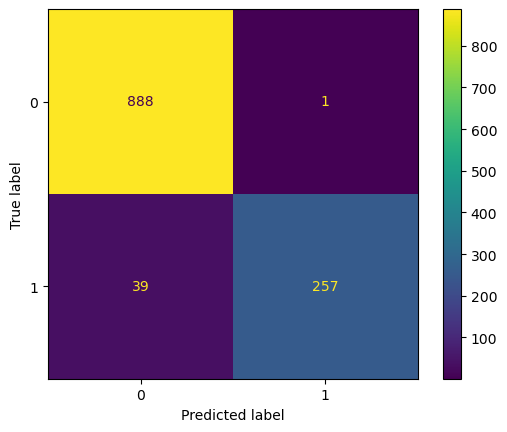

In [45]:
print("=== NAIVE BAYES ===")
print("Accuracy: {}".format(round(accuracy_bayes*100, 2)))
print("\nClassification report: \n{}".format(class_report_bayes))
print("\nConfusion matrix:")
disp_bayes.plot()
plt.show()

In [46]:
# evaluate the logreg model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log, labels=clf_log.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log, display_labels=clf_log.classes_)
class_report_log = classification_report(y_test, y_pred_log)

=== LOGISTIC REGRESSION ===
Accuracy: 94.6

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       889
           1       0.98      0.80      0.88       296

    accuracy                           0.95      1185
   macro avg       0.96      0.90      0.92      1185
weighted avg       0.95      0.95      0.94      1185


Confusion matrix:


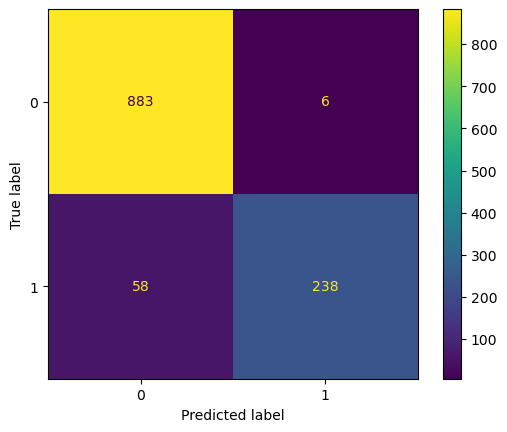

In [47]:
print("=== LOGISTIC REGRESSION ===")
print("Accuracy: {}".format(round(accuracy_log*100, 2)))
print("\nClassification report: \n{}".format(class_report_log))
print("\nConfusion matrix:")
disp_log.plot()
plt.show()

The **Naive Bayes model** performed better compared to the logistic regression model in all accounts. Metrics in the context of spam texts are summarised below: 

| Metric | Naive Bayes | Logistic regression |
|:--------:|:--------:|:--------:|
|  Precision   |  1.00   |  0.98   |
|  Recall   |  0.87   |  0.80   |
|  False negative ratio   |  0.13   |  0.20   |


## Assessing misclassified spam texts

In [48]:
# create a dataset of misclassed spam texts and the probability values associated with the predictions
# (i.e., a dataset of false negatives)
ham_list = list()
spam_list = list()

for p in list(clf_bayes.predict_proba(X_test_transf)):
    ham_list.append(p[0])
    spam_list.append(p[1])
    
print("Ham probabilities:", ham_list[:5])
print("\nSpam probabilities:", spam_list[:5])

bayes_missed_spam_df = pd.concat([X_test, y_test], axis=1)

bayes_missed_spam_df['PREDICTION'] = list(y_pred_bayes)
bayes_missed_spam_df['HAM PROB'] = ham_list
bayes_missed_spam_df['SPAM PROB'] = spam_list

Ham probabilities: [0.9809559250336979, 0.1705998457708733, 0.992533340785804, 0.9661568612279048, 0.9349755261668948]

Spam probabilities: [0.019044074966304846, 0.8294001542291246, 0.007466659214195899, 0.03384313877209473, 0.06502447383310399]


In [49]:
# preview the dataset
bayes_missed_spam_df[(bayes_missed_spam_df.LABEL==1) & (bayes_missed_spam_df.PREDICTION==0)].sort_values(by=['SPAM PROB']).tail()

,TEXT,LABEL,PREDICTION,HAM PROB,SPAM PROB
5825,helpcenter canada received transfer government...,1,0,0.547353,0.452647
5915,cmon babe txt fantasy babe need replies cost â...,1,0,0.530794,0.469206
2913,sorry u unsubscribe yet mob offer package min ...,1,0,0.514224,0.485776
5716,transaction aud 5903 made bank account 080217 ...,1,0,0.509409,0.490591
1063,new local dates area lots new people registere...,1,0,0.507172,0.492828


In [50]:
# export dataset of false negatives
bayes_missed_spam_df = bayes_missed_spam_df[(bayes_missed_spam_df.LABEL==1) & (bayes_missed_spam_df.PREDICTION==0)].sort_values(by=['SPAM PROB'])

bayes_missed_spam_df.to_csv(r'.\data\naive_bayes_missed_spam_texts.csv', index=False)

In [51]:
# create a dataset of misclassed spam texts and the probability values associated with the predictions
# (i.e., a dataset of false negatives)
ham_list = list()
spam_list = list()

for p in list(clf_log.predict_proba(X_test_transf)):
    ham_list.append(p[0])
    spam_list.append(p[1])
    
print("Ham probabilities:", ham_list[:5])
print("\nSpam probabilities:", spam_list[:5])

log_missed_spam_df = pd.concat([X_test, y_test], axis=1)

log_missed_spam_df['PREDICTION'] = list(y_pred_log)
log_missed_spam_df['HAM PROB'] = ham_list
log_missed_spam_df['SPAM PROB'] = spam_list

Ham probabilities: [0.9324354111875196, 0.3764800535898152, 0.9755932007564686, 0.9011857714793272, 0.9010334033261862]

Spam probabilities: [0.06756458881248043, 0.6235199464101848, 0.024406799243531414, 0.09881422852067279, 0.09896659667381377]


In [52]:
# export dataset of false negatives
log_missed_spam_df = log_missed_spam_df[(log_missed_spam_df.LABEL==1) & (log_missed_spam_df.PREDICTION==0)].sort_values(by=['SPAM PROB'])

log_missed_spam_df.to_csv(r'.\data\logistic_regression_missed_spam_texts.csv', index=False)

A quick look at the misclassified texts reveal two common types of spam messages that tend to be missed by the model:
1. **Phishing** (e.g., an SMS claiming to be from a bank, urging action to avoid financial penalty)
2. **Sexual solicitation** (not sharing an example of this, sorry)

It may be worth implementing a failsafe of sorts by introducing a third class, "Potential spam", which flags potentially suspicious content. 

___

# Spam detector demonstrations

1. The input text message is passed as a list of a single string element 
2. Count vectorisation and TF-IDF transformation are both applied
3. The **probabilities** of the text message being spam - **p(Spam)** - or ham - **p(Ham)** - are returned
4. The categories are determined as per the conditions below: 


| Condition | Category | |
|:--------:|:--------:|:--------:|
|  p(Spam) >= 50%   |  Spam   |    |
|  30% <= p(Spam) < 50%   |  Potential spam   |    |
|  Neither of the above    |  Ham   |     |

## Functions and examples

In [53]:
def predict_bayes(input_mail):    
    # preprocess text
    input_counts = vectoriser.transform(input_mail)
    input_transf = tfidf_transformer.transform(input_counts)
    
    # make prediction
    prediction = clf_bayes.predict(input_transf)
    prediction_prob = list(clf_bayes.predict_proba(input_transf))
    
    # return results
    if prediction[0] == 0 and prediction_prob[0][0] >= 0.7:
        result = "Ham"
    elif prediction[0] == 0 and prediction_prob[0][0] < 0.7:
        result = "!!Potential spam!!"
    else:
        result = "!!Spam!!"
    
    print("\nMessage:", input_mail[0])
    print("Prediction:", result)
    print("- p(Ham):", round(prediction_prob[0][0], 2))
    print("- p(Spam):", round(prediction_prob[0][1], 2))
    
    return 0

In [54]:
def predict_log(input_mail):    
    # preprocess text
    input_counts = vectoriser.transform(input_mail)
    input_transf = tfidf_transformer.transform(input_counts)
    
    # make prediction
    prediction = clf_log.predict(input_transf)
    prediction_prob = list(clf_log.predict_proba(input_transf))
    
    # return results
    if prediction[0] == 0 and prediction_prob[0][0] >= 0.7:
        result = "Ham"
    elif prediction[0] == 0 and prediction_prob[0][0] < 0.7:
        result = "!!Potential spam!!"
    else:
        result = "!!Spam!!"
    
    print("\nMessage:", input_mail[0])
    print("Prediction:", result)
    print("- p(Ham):", round(prediction_prob[0][0], 2))
    print("- p(Spam):", round(prediction_prob[0][1], 2))
    
    return 0

In [55]:
# obvious ham/non-obvious ham
ham_1 = ["Text me when you're home. Thanks for hanging out today!"]
ham_2 = ["hi sarah did you receive the payment yet i just transferred u. call sascha if not. her number is 04306810284"]

# obvious spam/non-obvious spam
spam_1 = ["WINNER!!! as a valued network customer u have been slected to receive a $900,000 prize reward! To claim call 09061701461. code KL341. valid 12 hours only."]
spam_2 = ["Australian Taxation Office: We have processed your Tax Return and it is available for you to claim. Visit www.atorefund.com"]

# demonstrating the naive bayes model 
print("=== NAIVE BAYES ===")
for i in [ham_1, ham_2, spam_1, spam_2]:
    predict_bayes(i)

=== NAIVE BAYES ===

Message: Text me when you're home. Thanks for hanging out today!
Prediction: Ham
- p(Ham): 0.94
- p(Spam): 0.06

Message: hi sarah did you receive the payment yet i just transferred u. call sascha if not. her number is 04306810284
Prediction: !!Potential spam!!
- p(Ham): 0.67
- p(Spam): 0.33

Message: WINNER!!! as a valued network customer u have been slected to receive a $900,000 prize reward! To claim call 09061701461. code KL341. valid 12 hours only.
Prediction: !!Spam!!
- p(Ham): 0.01
- p(Spam): 0.99

Message: Australian Taxation Office: We have processed your Tax Return and it is available for you to claim. Visit www.atorefund.com
Prediction: !!Potential spam!!
- p(Ham): 0.51
- p(Spam): 0.49


In [56]:
# demonstrating the logreg model 
print("=== LOGISTIC REGRESSION ===")
for i in [ham_1, ham_2, spam_1, spam_2]:
    predict_log(i)

=== LOGISTIC REGRESSION ===

Message: Text me when you're home. Thanks for hanging out today!
Prediction: Ham
- p(Ham): 0.83
- p(Spam): 0.17

Message: hi sarah did you receive the payment yet i just transferred u. call sascha if not. her number is 04306810284
Prediction: !!Potential spam!!
- p(Ham): 0.63
- p(Spam): 0.37

Message: WINNER!!! as a valued network customer u have been slected to receive a $900,000 prize reward! To claim call 09061701461. code KL341. valid 12 hours only.
Prediction: !!Spam!!
- p(Ham): 0.08
- p(Spam): 0.92

Message: Australian Taxation Office: We have processed your Tax Return and it is available for you to claim. Visit www.atorefund.com
Prediction: !!Potential spam!!
- p(Ham): 0.56
- p(Spam): 0.44


## Try it yourself!

In [60]:
# type in your text to be screened between the quotation marks
# the text can contain multiple lines
text_here = """ 
can you swing by kfc otw back i'm hungry!!
lemme know how much and i'll transfer you 

btw don't eat my fries
"""

In [61]:
if text_here: 
    input_mail = list()
    input_mail.append(text_here)

    print("=== NAIVE BAYES ===")
    predict_bayes(input_mail)
    print("\n=== LOGISTIC REGRESSION ===")
    predict_log(input_mail)

=== NAIVE BAYES ===

Message:  
can you swing by kfc otw back i'm hungry!!
lemme know how much and i'll transfer you 

btw don't eat my fries

Prediction: Ham
- p(Ham): 0.99
- p(Spam): 0.01

=== LOGISTIC REGRESSION ===

Message:  
can you swing by kfc otw back i'm hungry!!
lemme know how much and i'll transfer you 

btw don't eat my fries

Prediction: Ham
- p(Ham): 0.93
- p(Spam): 0.07


___

# Conclusion

1. **The Naive Bayes model showed perfect precision with regards to spam**, although it's definitely also worth noting that the logistic regression model's precision rate is nowhere near poor. In other words, if the algorithms marks a message as spam, the likelihood of that message actually being spam is very high.
2. "**The Naive Bayes model was more sensitive to spam, relative to the logistic regression model**. This indicates that the Naive Bayes model presents a lower risk of misclassifying spam texts as legitimate ones. 
3. **Introducing a third classification category - "Potential spam" - may be helpful in flagging malicious messages that would have otherwise been false negatives**. The content of these messages can then be manually reviewed and verified before any further action is taken.

## Next steps

1. **Comparing model performance across __[other classification algorithms](https://au.mathworks.com/campaigns/offers/next/choosing-the-best-machine-learning-classification-model-and-avoiding-overfitting.html)__ beyond Naive Bayes and logistic regression**, e.g., k-nearest neighbours and support vector machines.
2. **Training the model on a richer dataset across different languages**. Data on the most __[current and increasingly sophisticated](https://www.scamwatch.gov.au/news-alerts/browse-news-alerts?f%5B0%5D=scam_category%3A29)__ phishing attempts would be invaluable.
3. **Further improving the algorithm's performance by incorporating input beyond the language-based contents of an SMS**. For instance, __[myGov Australia never sends an SMS with a link](https://www.servicesaustralia.gov.au/active-scams?context=60271#:~:text=These%20are%20all%20scams.,a%20new%20myGov%20Inbox%20message)__. Messages claiming to be from myGov can be screened for such links to better capture otherwise legitimate-sounding scams. Blacklisted phone numbers may also be taken into account by the model.